# Yelp Data Challenge - Clustering and PCA

BitTiger DS501

Nov 2017

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [4]:
df = pd.read_csv('yelp_dataset_challenge_round10/last_2_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2016-10-30,0,tYrSbjX3QgZGBZuQ3n8g6w,5,"After the most incredible service, delicious m...",2,PiWlV_UC_-SXqyxQM9fAtw


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [5]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [6]:
# Make a column and take the values, save to a variable named "target"
df['favorable'] = df['stars'] > 4
target = df['favorable'].values

#### You may want to look at the statistic of the target variable

In [6]:
# To be implemented
target.mean(), target.std()

(0.46823543132843698, 0.49898999206107286)

In [7]:
documents.shape, target.shape

((325819,), (325819,))

### Create training dataset and test dataset

In [8]:
from sklearn.cross_validation import train_test_split

/Users/Danielle/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
documents_train, documents_test, target_train, target_test = train_test_split(
    documents,
    target,
    test_size = 0.5,
    random_state = 11
)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words = 'english', max_features=1000)

In [70]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(documents_train).toarray()

In [71]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [72]:
# Use the trained model to transform all the reviews
vectors_test = vectorizer.transform(documents_test).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [73]:
# To be implemented
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [74]:
# To be implemented
kmeans.predict(vectors_test)

array([2, 2, 3, ..., 3, 2, 2], dtype=int32)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [75]:
# To be implemented
print ("cluster centers:")
print (kmeans.cluster_centers_)

cluster centers:
[[ 0.00266287  0.00869867  0.00157526 ...,  0.00119834  0.00576954
   0.00891356]
 [ 0.00324191  0.0076239   0.00235664 ...,  0.00088229  0.00327664
   0.00747297]
 [ 0.00250699  0.00636763  0.00228111 ...,  0.00114868  0.00360607
   0.00663519]
 ..., 
 [ 0.00178463  0.00666897  0.00267052 ...,  0.00095514  0.00283179
   0.00645762]
 [ 0.00066105  0.0045073   0.0012697  ...,  0.00138719  0.00248321
   0.00642364]
 [ 0.00439932  0.01968787  0.0026503  ...,  0.00394537  0.00067296
   0.00171763]]


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [76]:
# To be implemented
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print ("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print ("%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top features for each cluster:
0: chicken, good, fried, food, rice, ordered, place, like, great, sauce
1: burger, fries, burgers, good, cheese, shake, place, food, great, ordered
2: good, food, place, vegas, best, service, like, really, delicious, just
3: love, place, food, great, service, good, amazing, best, friendly, delicious
4: pizza, crust, good, place, great, slice, cheese, order, best, just
5: sushi, rolls, place, roll, ayce, great, good, fresh, fish, service
6: great, food, service, place, amazing, good, friendly, definitely, staff, awesome
7: food, order, time, service, just, minutes, came, didn, got, like


#### Try different k
If you set k == to a different number, how does the top features change?

In [77]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(vectors_train)
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print ("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print ("%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top features for each cluster:
0: chicken, fried, food, good, rice, ordered, place, great, like, sauce
1: good, food, burger, really, place, fries, service, like, pretty, nice
2: place, food, best, vegas, amazing, delicious, love, service, ve, like
3: pizza, crust, good, place, great, slice, cheese, order, best, just
4: great, food, service, place, amazing, friendly, good, staff, awesome, atmosphere
5: food, order, just, time, service, minutes, like, came, didn, got


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [78]:
assigned_cluster = kmeans.transform(vectors_train).argmin(axis=1)
#assigned_cluster = kmeans.predict(vectors_train)

In [79]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_train.shape[0])[assigned_cluster==i]
    sample_review = np.random.choice(cluster, 3, replace=False)
    print ("cluster %d:" % i)
    for rating in sample_review:
        print ("    %s" % df.loc[rating]['stars'],"    %s" % df.loc[rating]['favorable'])

cluster 0:
    1     False
    4     False
    4     False
cluster 1:
    4     False
    5     True
    3     False
cluster 2:
    4     False
    1     False
    4     False
cluster 3:
    3     False
    5     True
    2     False
cluster 4:
    5     True
    5     True
    1     False
cluster 5:
    5     True
    4     False
    4     False


## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [11]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
df_sort = df[['business_id']].groupby(['business_id']).size().reset_index(name='counts')
df_sort.sort_values(['counts'], ascending=False).head(3)

,business_id,counts
3152,hihud--QRriCYZw1zZvW4g,2765
1909,RESDUcs7fIiihp38-d6_6g,2491
2783,cYwJA2A6I12KNkm2rtXd5g,1988


In [12]:
#must rest index in this step!
df_top_restaurant = df.loc[df['business_id'] == 'hihud--QRriCYZw1zZvW4g'].reset_index() 
df_top_restaurant.shape

(2765, 14)

In [106]:
df_top_restaurant.head()

,index,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,favorable
0,240672,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"['Restaurants', 'Barbeque', 'Asian Fusion', 'J...",4.5,0,2016-03-26,0,kd4UZwpH86KUxGr4pwafHQ,5,The food was soooo good. Defintiely worth the ...,0,mW_hZQb_ZHiV-EhuXn9NkQ,True
1,240673,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"['Restaurants', 'Barbeque', 'Asian Fusion', 'J...",4.5,0,2015-12-25,0,hb-vHJj08C9PcPk5GhvmLA,5,"The BBQ is yummy, and the soup is delicious. B...",0,DEmhjzcwgAfVI6Z23qxlIQ,True
2,240674,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"['Restaurants', 'Barbeque', 'Asian Fusion', 'J...",4.5,1,2016-01-14,0,k4QFvv-0Es9n7864hEfaZw,5,I ate here for the first time with my Dad. Our...,1,9imSnJsjKTSTMlyMZ3EYYg,True
3,240675,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"['Restaurants', 'Barbeque', 'Asian Fusion', 'J...",4.5,1,2016-07-12,1,MSO2c0jJxffesZ5nyhChiA,5,Arguably the best Korean BBQ I've ever eaten!!...,1,GtikpvzhSeE4OszoFO1-3A,True
4,240676,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"['Restaurants', 'Barbeque', 'Asian Fusion', 'J...",4.5,0,2017-01-19,0,d97BSImX_nu-oQh-IL7H4Q,5,Amazing food and great service! Enjoyed Kore...,0,-jEryluA1cM-rkkT6bwr9w,True


We can also load restaurant profile information from the business dataset (optional)

In [83]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)

### Vectorize the text feature

In [13]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [14]:
# To be implemented
df_top_restaurant['favorable'] = df_top_restaurant['stars'] > 4
target_top_restaurant = df_top_restaurant['favorable'].values

#### Check the statistic of the target variable

In [86]:
# To be implemented
target_top_restaurant.mean(), target_top_restaurant.std()

(0.73526220614828208, 0.44119348857189988)

### Create training dataset and test dataset

In [15]:
from sklearn.cross_validation import train_test_split

In [16]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
tr_train, tr_test, tr_target_train, tr_target_test = train_test_split(
    documents_top_restaurant,
    target_top_restaurant,
    test_size = 0.7,
    random_state = 111
)

### Get NLP representation of the documents

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_features=1000)

In [22]:
# Train the model with your training data
tr_train = vectorizer.fit_transform(tr_train).toarray()

In [23]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [24]:
# Use the trained model to transform the test data
tr_test = vectorizer.transform(tr_test).toarray()

In [25]:
# Use the trained model to transform all the data
X = vectorizer.transform(documents_top_restaurant).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [97]:
# To be implemented
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(tr_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [98]:
# To be implemented
kmeans.predict(X)

array([2, 5, 6, ..., 1, 7, 4], dtype=int32)

#### Inspect the centroids

In [99]:
# To be implemented
print ("cluster centers:")
print (kmeans.cluster_centers_)

cluster centers:
[[  1.19262239e-18  -2.25514052e-17   4.33680869e-18 ...,   1.02092040e-02
    1.81939188e-03   1.08420217e-18]
 [ -6.50521303e-19   9.14016101e-03   6.75594183e-04 ...,   3.83612619e-03
    1.36111021e-02   6.11963974e-03]
 [  5.43031598e-03   1.12598072e-02   2.05379900e-03 ...,  -2.16840434e-18
    1.14413941e-02   5.42101086e-19]
 ..., 
 [  1.31263426e-03   1.06850515e-02   3.92714753e-03 ...,   1.80600604e-03
    6.99164148e-03   5.19837282e-04]
 [  1.30104261e-18   1.02608107e-02   4.77048956e-18 ...,  -2.16840434e-18
    8.64454586e-03   1.19262239e-18]
 [  1.62630326e-18   3.99767817e-03   4.70079422e-03 ...,   2.45621373e-03
    6.22597820e-03   1.19262239e-18]]


#### Find the top 10 features for each cluster.

In [100]:
# To be implemented
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print ("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print ("%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top features for each cluster:
0: good, meat, food, service, quality, place, nice, portions, great, really
1: spicy, pork, good, really, soup, like, belly, tofu, chicken, bbq
2: happy, hour, great, food, good, awesome, place, definitely, came, come
3: vegas, las, come, bbq, time, best, korean, good, restaurant, great
4: staff, friendly, food, good, place, wait, great, clean, nice, helpful
5: food, place, delicious, meat, amazing, service, time, got, definitely, come
6: great, food, service, delicious, atmosphere, place, meat, bbq, time, recommend
7: korean, bbq, best, ve, place, food, definitely, vegas, places, restaurant


In [101]:
tr_train.shape

(829, 1000)

In [102]:
tr_test.shape

(1936, 1000)

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [108]:
# To be implemented
assigned_cluster = kmeans.transform(tr_train).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, tr_train.shape[0])[assigned_cluster==i]
    sample_review = np.random.choice(cluster, 3, replace=False)
    print ("cluster %d:" % i)
    for rating in sample_review:
        print ("    %s" % df_top_restaurant.loc[rating]['stars'],"    %s" % df_top_restaurant.loc[rating]['favorable'])

cluster 0:
    4     False
    5     True
    5     True
cluster 1:
    3     False
    2     False
    5     True
cluster 2:
    5     True
    5     True
    5     True
cluster 3:
    5     True
    5     True
    4     False
cluster 4:
    4     False
    5     True
    4     False
cluster 5:
    5     True
    5     True
    5     True
cluster 6:
    5     True
    5     True
    5     True
cluster 7:
    5     True
    5     True
    2     False


## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(tr_train)
X_test = scaler.fit_transform(tr_test)

### Use PCA to transform data (train and test) and get princial components

In [167]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

pca = PCA(n_components)

train_components = pca.fit_transform(X_train)# fit: get V, lambda; transform: X_train*V
test_components = pca.transform(X_test)

### See how much (and how much percentage of) variance the principal components explain

In [111]:
# To be implemented
print (pca.explained_variance_.shape)
print (pca.explained_variance_)

(50,)
[ 8.03138542  6.08529625  5.45585175  5.27020178  5.24119713  5.00913959
  4.88146342  4.86109843  4.75535709  4.67314275  4.6230613   4.60122696
  4.4780189   4.34930948  4.32478944  4.31065697  4.29540243  4.20794497
  4.18514095  4.13030916  4.09388351  4.08580979  4.05069867  4.02676031
  3.98125891  3.96396067  3.92080005  3.90609374  3.879845    3.8667013
  3.83219168  3.80785405  3.79723721  3.76157411  3.72800056  3.70639787
  3.65376769  3.62887432  3.61231671  3.59732243  3.56779044  3.53344618
  3.49439633  3.46589713  3.44556732  3.41372011  3.37753104  3.34989561
  3.3353404   3.3257913 ]


In [112]:
# To be implemented
print (pca.components_.shape)
print (pca.components_)

(50, 1000)
[[ 0.01607509 -0.00545404  0.00618033 ...,  0.00860396 -0.01111483
   0.03765652]
 [-0.01063174  0.00389014  0.01205356 ..., -0.02422164 -0.02575185
  -0.0211227 ]
 [-0.02057785  0.00292102 -0.0255083  ..., -0.00156757  0.00776976
   0.00339975]
 ..., 
 [ 0.03360857 -0.01884128 -0.0374976  ...,  0.02138236  0.001879
  -0.02601916]
 [ 0.0267301   0.030169    0.02301188 ..., -0.01560879  0.04545141
  -0.03107634]
 [ 0.03431148 -0.00241332  0.07219638 ...,  0.04262624  0.0004638
   0.03587992]]


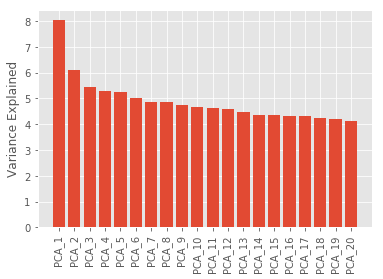

In [174]:
pca_range = np.arange(n_components) + 1
pca_names = ['PCA_%s' % i for i in pca_range]
plt.bar(pca_range[:20], pca.explained_variance_[:20], align='center')
xticks = plt.xticks(pca_range[:20], pca_names, rotation=90)
plt.ylabel('Variance Explained')

### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [170]:
pca_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

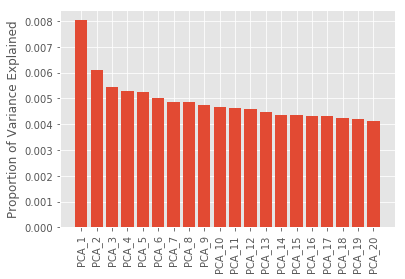

In [173]:
pca_range = np.arange(n_components) + 1
pca_names = ['PCA_%s' % i for i in pca_range]
plt.bar(pca_range[:20], pca.explained_variance_ratio_[:20], align='center')
xticks = plt.xticks(pca_range[:20], pca_names, rotation=90)
plt.ylabel('Proportion of Variance Explained')

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [126]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(tr_train, tr_target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
# Get score for training set
model.score(tr_train, tr_target_train)

0.82267792521109773

In [128]:
# Get score for test set
model.score(tr_test, tr_target_test)

0.74948347107438018

#### Use (Stardardized + PCA) tf-idf vectors as features

In [191]:
# Build a Logistic Regression Classifier, train with PCA tranformed X
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_components, tr_target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [143]:
# Get score for training set
model.score(train_components, tr_target_train)

0.79613992762364294

In [144]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model.score(test_components, tr_target_test)

0.7649793388429752

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: PCA results have better perfoemance on test results but worse results on training results. This is because PCA processing will do feature selections, and decrease the model interpretability, but also decrease the model variance. 
The coefficeints fluctuate a lot against PCA.

#### You can plot the coefficients against principal components


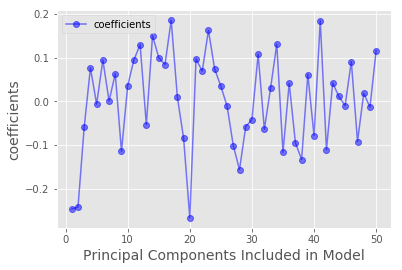

In [192]:
# visualize the covariance of transformed feature matrix
plt.plot(pca_range, model.coef_[0], marker='o', color='b', alpha=.5, label='coefficients')
plt.ylabel('coefficients', fontsize=14)
plt.xlabel('Principal Components Included in Model', fontsize=14)

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [129]:
# Build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1,n_estimators=20,max_depth=15,min_samples_leaf=3, random_state=1)
model.fit(tr_train, tr_target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [130]:
# Get score for training set
model.score(tr_train, tr_target_train)

0.80096501809408926

In [131]:
# Get score for test set
model.score(tr_test, tr_target_test)

0.74793388429752061

#### Use (Stardardized + PCA) tf-idf vectors as features

In [193]:
# Build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1,n_estimators=20,max_depth=15,min_samples_leaf=3, random_state=1)
model.fit(train_components, tr_target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [195]:
# Get score for training set
model.score(train_components, tr_target_train)

0.96260554885404104

In [196]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model.score(test_components, tr_target_test)

0.74845041322314054

#### Q: What do you see from the training result and the test result?

A: PCA processing has great effect on training set, and improve the performance a lot, but has minor effect on testing set. 
The feature importances fluctuate with PCA after the first one

Random forest have too much noise
testing results are not better

#### You can plot the feature importances against principal components


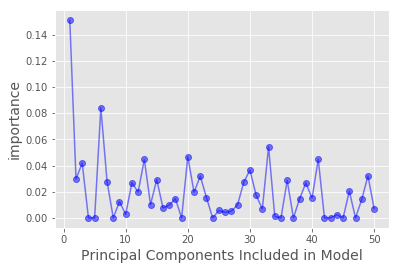

In [194]:
plt.plot(pca_range, model.estimators_[0].feature_importances_, marker='o', color='b', alpha=.5, label='importance')
plt.ylabel('importance', fontsize=14)
plt.xlabel('Principal Components Included in Model', fontsize=14)

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [164]:
# Take the values of the column that contains review text data, save to a variable named "documents"
df_selected_business = pd.read_csv('yelp_dataset_challenge_round10/selected_business.csv')
documents_ca = df_selected_business['categories'].values
vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(documents_ca)
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X)
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-6:-1]
print ("top features for each cluster with 50 max features:")
for num, centroid in enumerate(top_centroids):
    print ("%d: %s" % (num, ", ".join(features[i] for i in centroid)))
#df has different number of count for each business entities, need to use df_selected_business from business file

top features for each cluster with 50 max features:
0: american, traditional, new, restaurants, breakfast
1: food, restaurants, tea, specialty, coffee
2: bars, nightlife, sushi, restaurants, american
3: mexican, restaurants, food, seafood, american
4: restaurants, sandwiches, italian, steakhouses, barbeque
5: pizza, restaurants, italian, wings, chicken
6: chinese, restaurants, asian, fusion, fast
7: fast, food, burgers, restaurants, sandwiches


## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

In [18]:
import random
import numpy as np
from scipy.spatial.distance import pdist
from scipy.spatial.distance import euclidean
from collections import defaultdict
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from itertools import combinations
% matplotlib inline

def k_means(X, k=5, max_iter=1000):
    """Performs k means

    Args:
    - X - feature matrix
    - k - number of clusters
    - max_iter - maximum iteratations

    Returns:
    - clusters - dict mapping cluster centers to observations
    """
    centers = [tuple(pt) for pt in random.sample(list(X), k)]
    for i in range(max_iter):
        clusters = defaultdict(list)

        for datapoint in X:
            distances = [pdist((datapoint, center), 'jaccard')for center in centers]
            #distances = [euclidean(datapoint, center) for center in centers]
            center = centers[np.argmin(distances)]
            clusters[center].append(datapoint)

        new_centers = []
        for center, pts in clusters.items():
            new_center = np.mean(pts, axis=0)
            new_centers.append(tuple(new_center))

        if set(new_centers) == set(centers):
            break

        centers = new_centers

    return clusters


def sse(clusters):
    """Sum squared euclidean distance of all points to their cluster center"""
    sum_squared_residuals = 0
    for center, pts in clusters.items():
        for pt in pts:
            sum_squared_residuals += euclidean(pt, center)**2
    return sum_squared_residuals


def plot_k_sse(X, min_k, max_k):
    """Plots sse for values of k between min_k and max_k

    Args:
    - X - feature matrix
    - min_k, max_k - smallest and largest k to plot sse for
    """
    k_values = range(min_k, max_k+1)
    sse_values = []
    for k in k_values:
        clusters = k_means(X, k=k)
        sse_values.append(sse(clusters))
    plt.plot(k_values, sse_values)
    plt.xlabel('k')
    plt.ylabel('sum squared error')


def turn_clusters_into_labels(clusters):
    """Converts clusters dict returned by k_means into X, y (labels)

    Args:
    - clusters - dict mapping cluster centers to observations
    """
    labels = []
    new_X = []
    label = 0
    for cluster, pts in clusters.items():
        for pt in pts:
            new_X.append(pt)
            labels.append(label)
        label += 1
    return np.array(new_X), np.array(labels)


def plot_k_silhouette(X, min_k, max_k):
    """Plots sse for values of k between min_k and max_k

    Args:
    - X - feature matrix
    - min_k, max_k - smallest and largest k to plot sse for
    """
    k_values = range(min_k, max_k+1)
    silhouette_scores = []
    for k in k_values:
        clusters = k_means(X, k=k)
        new_X, labels = turn_clusters_into_labels(clusters)
        silhouette_scores.append(silhouette_score(new_X, labels))

    plt.plot(k_values, silhouette_scores)
    plt.xlabel('k')
    plt.ylabel('silhouette score')


def plot_all_2d(X, feature_names, k=3):
    """Generates all possible 2d plots of observations color coded by cluster ID"""
    pairs = list(combinations(range(X.shape[1]), 2))
    fig, axes = plt.subplots((len(pairs) // 2), 2)
    flattened_axes = [ax for ls in axes for ax in ls]

    for pair, ax in zip(pairs, flattened_axes):
        pair = np.array(pair)
        plot_data_2d(X[:, pair], feature_names[pair], ax, k=k)


def plot_data_2d(X, plot_labels, ax, k=3):
    """Generates single 2d plot of observations color coded by cluster ID"""
    clusters = k_means(X, k=k)
    new_X, labels = turn_clusters_into_labels(clusters)
    ax.scatter(new_X[:, 0], new_X[:, 1], c=labels)
    ax.set_xlabel(plot_labels[0])
    ax.set_ylabel(plot_labels[1])

In [26]:
clustered_X = k_means(tr_train, k=6, max_iter=1000)

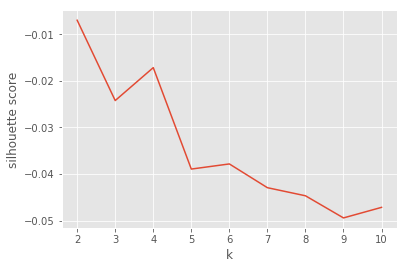

In [27]:
plot_k_silhouette(tr_train, 2, 10)

from scipy.spatial.distance import pdist, squareform
Y = pdist(X, 'jaccard')
Y = pdist(X, 'euclidean')
Y = pdist(X, 'cosine')

Use the command above to change the kmeans function and compre with Cosine distance or Euclidean distance using Silhouette figure

cosine distance is scaled

## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

In [157]:
import json
file_business, file_checkin, file_review, file_tip, file_user = [
    'yelp_dataset_challenge_round10/business.json',
    'yelp_dataset_challenge_round10/checkin.json',
    'yelp_dataset_challenge_round10/review.json',
    'yelp_dataset_challenge_round10/tip.json',
    'yelp_dataset_challenge_round10/user.json'
]
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [166]:
business_ca = df_business['categories'].apply(', '.join).values
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(business_ca).toarray()
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X)
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print ("top features for each cluster with 1000 max features:")
for num, centroid in enumerate(top_centroids):
    print ("%d: %s" % (num, ", ".join(features[i] for i in centroid)))

top features for each cluster with 1000 max features:
0: shopping, automotive, services, auto, repair, fashion, life, active, pet, stores
1: spas, beauty, salons, hair, nail, removal, barbers, skin, day, care
2: medical, health, dentists, doctors, dentistry, general, massage, therapy, cosmetic, chiropractors
3: home, services, real, estate, garden, shopping, apartments, contractors, stores, local
4: food, fast, restaurants, grocery, bakeries, specialty, burgers, sandwiches, ice, yogurt
5: event, hotels, planning, travel, services, caterers, spaces, venues, party, transportation
6: restaurants, bars, american, nightlife, pizza, italian, chinese, traditional, mexican, new
7: tea, coffee, food, cafes, restaurants, bakeries, brunch, breakfast, donuts, sandwiches


Each cluster means different kinds of business

## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"? The closet data points to the centroids

In [198]:
#take the df as an example
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
X = vectorizer.transform(documents).toarray()
km = KMeans(n_clusters=6).fit(X)
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)

In [199]:
closest

array([    12,  34562, 285570,    301,   3806,   4659])

In [211]:
# print the best restaurant in each cluster
for i in range(kmeans.n_clusters-2):
    print ("cluster %d:" % i)
    print (df.loc[closest[i],"name"] )

cluster 0:
Delmonico Steakhouse
cluster 1:
Sofia's Pizza
cluster 2:
DW Bistro
cluster 3:
Michael Mina
cluster 4:
Le Thai
cluster 5:
Herringbone


## Extra Credit #5: Can you think of other use cases that clustering can be used? 
Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.
Use the attribute in business dataset. 

In [212]:
business_at = df_business['attributes'].apply(', '.join).values
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(business_at).toarray()
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X)
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print ("top features for each cluster with 1000 max features:")
for num, centroid in enumerate(top_centroids):
    print ("%d: %s" % (num, ", ".join(features[i] for i in centroid)))

top features for each cluster with 1000 max features:
0: restaurantspricerange2, businessparking, businessacceptscreditcards, bikeparking, wheelchairaccessible, wifi, restaurantstakeout, caters, outdoorseating, dogsallowed
1: byappointmentonly, businessacceptscreditcards, businessparking, bikeparking, restaurantspricerange2, wheelchairaccessible, goodforkids, hairspecializesin, dogsallowed, restaurantstakeout
2: restaurantsattire, restaurantsreservations, restaurantsgoodforgroups, restaurantsdelivery, goodformeal, restaurantstakeout, restaurantstableservice, outdoorseating, goodforkids, hastv
3: businessacceptsbitcoin, byappointmentonly, businessacceptscreditcards, wheelchairaccessible, bikeparking, businessparking, restaurantspricerange2, dogsallowed, hairspecializesin, acceptsinsurance
4: goodforkids, businessparking, wifi, bikeparking, businessacceptscreditcards, dogsallowed, restaurantstakeout, restaurantsgoodforgroups, restaurantspricerange2, restaurantsdelivery
5: goodfordancing,